In this example, we'll download the Weiler et al Nature (2014) dataset, commonly called the "Chessboard" dataset.

In [33]:
%matplotlib inline

In [1]:
import ndio
print ndio.version

1.0.0


First, we'll list the available channels in the dataset, which has the token `Ex3R43C1` in the NeuroData datastore.

In [2]:
import ndio.remote.neurodata as neurodata
nd = neurodata()

In [3]:
token = 'Ex3R43C1'
channels = nd.get_channels(token)
print channels.keys()

[u'NR2B_7', u'vGluT2_1', u'NR2B_3', u'Synapsin1_3', u'vGluT2_7', u'PSD95_2', u'NR2A_4', u'GluR4_8', u'GFP_4', u'Gephyrin_1', u'GABAARa1_8', u'GluR2_6', u'GAD6567_4', u'Arc_3', u'GluR1_6', u'Synaptopodin_7', u'DAPI_7', u'DAPI_6', u'DAPI_4', u'DAPI_3', u'DAPI_2', u'DAPI_1', u'DAPI_8', u'PV25_1', u'vGAT_2', u'vGluT1_2']


Now we'll download a small volume of `DAPI_1` as a proof of concept.

In [4]:
query = {
    'token': token,
    'channel': 'DAPI_1',
    'x_start': 416,
    'x_stop': 616,
    'y_start': 1850,
    'y_stop': 2000,
    'z_start': 0,
    'z_stop': 50,
    'resolution': 0
}

example_volume = nd.get_cutout(**query)

To visualize this volume, we'll use PIL. (You may not have this installed on your system by default, and you may need to `pip install pillow` to get this functionality.)

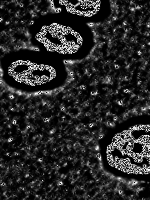

In [5]:
from PIL import Image
Image.fromarray(example_volume[:,:,6].astype('uint8'))

For our final trick, we'll download a sample volume from each channel, and generate a dictionary relating channel names to data.

> **Note**: This can take a very long time to download, depending on your internet connection. I've stored the variable in this jupyter notebook, which means that you may not get the latest data, but you'll get it immediately. To disable this functionality, delete the `if c not in all_data` conditional, and dedent its `get_cutout` body.

In [38]:
query = {
    'token': token,
    'x_start': 416,
    'x_stop': 616,
    'y_start': 1850,
    'y_stop': 2000,
    'z_start': 0,
    'z_stop': 50,
    'resolution': 0
}

if 'all_data' not in globals() or len(all_data.keys()) == 0:
    all_data = {}
    for c in channels.keys():
        query['channel'] = c
        print "{}".format(c),
        if c not in all_data:
            all_data[c] = nd.get_cutout(**query)
    %store all_data

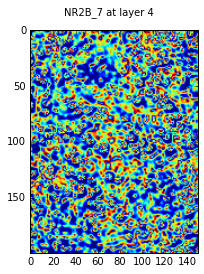

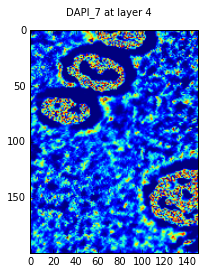

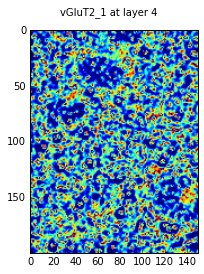

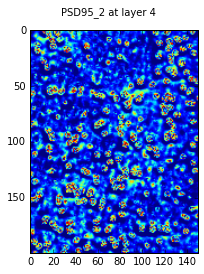

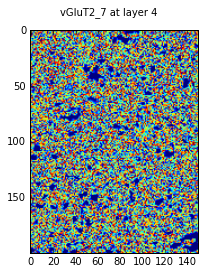

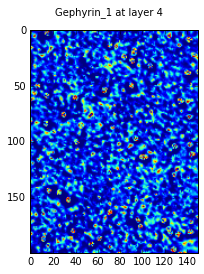

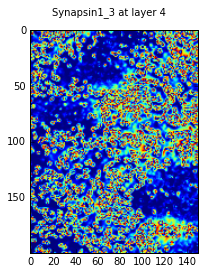

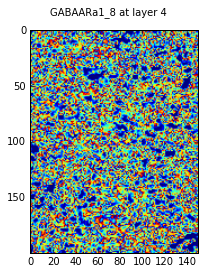

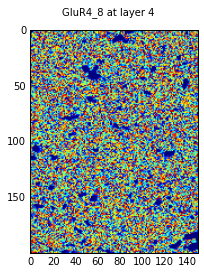

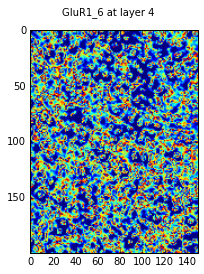

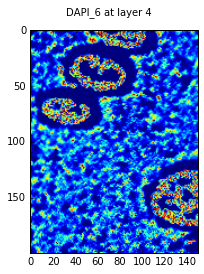

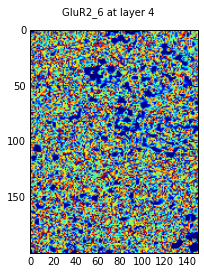

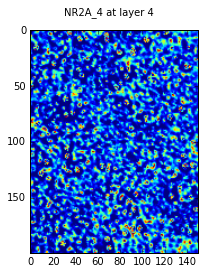

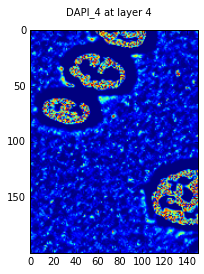

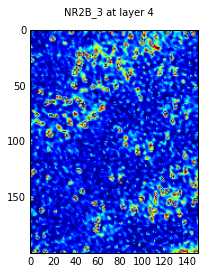

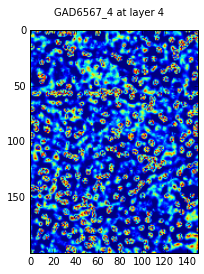

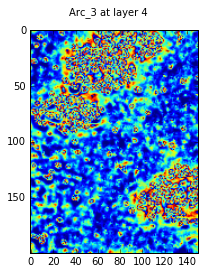

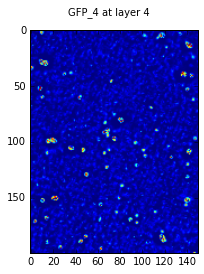

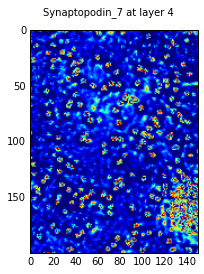

In [39]:
import matplotlib.pyplot as plt 
layer = 4

for k,v in all_data.iteritems():
    plt.figure()
    plt.suptitle("{} at layer {}".format(k, layer))
    plt.imshow(Image.fromarray(v[:,:,layer].astype('uint8')))